In [1]:
import numpy as np
import h5py as h5
import glob
import sys
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

In [19]:
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
# plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [20]:
case = 'Naches'

In [21]:
path = f'./{case}/'
fl = glob.glob(path + f'{case}_MODIS_LAI_07042002_02102024_*.h5')

In [ ]:
for file in fl:
    with h5.File(file) as f:
        print()
        print(file)
        print(f.keys())
        for k in f.keys():
            if k == 'time [s]':
                print('start:', f[k][0]/86400, 'd', 'end:', f[k][-1]/86400, 'd')
                print('length:', (f[k][-1]-f[k][0])/86400, (f[k][-1]-f[k][0])/86400+1, 'd', (f[k][-1]-f[k][0])/86400/365, ((f[k][-1]-f[k][0])/86400+1)/365, 'yr')
        print()

In [92]:
with h5.File('./Naches_MODIS_LAI_07042002_02102024_typical43yr.h5') as f:
    everg = f['NLCD Evergreen Forest LAI [-]'][92:]
    shrub = f['NLCD Shrub Scrub LAI [-]'][92:]
    grass = f['NLCD Grassland Herbaceous LAI [-]'][92:]
everg.shape

(15603,)

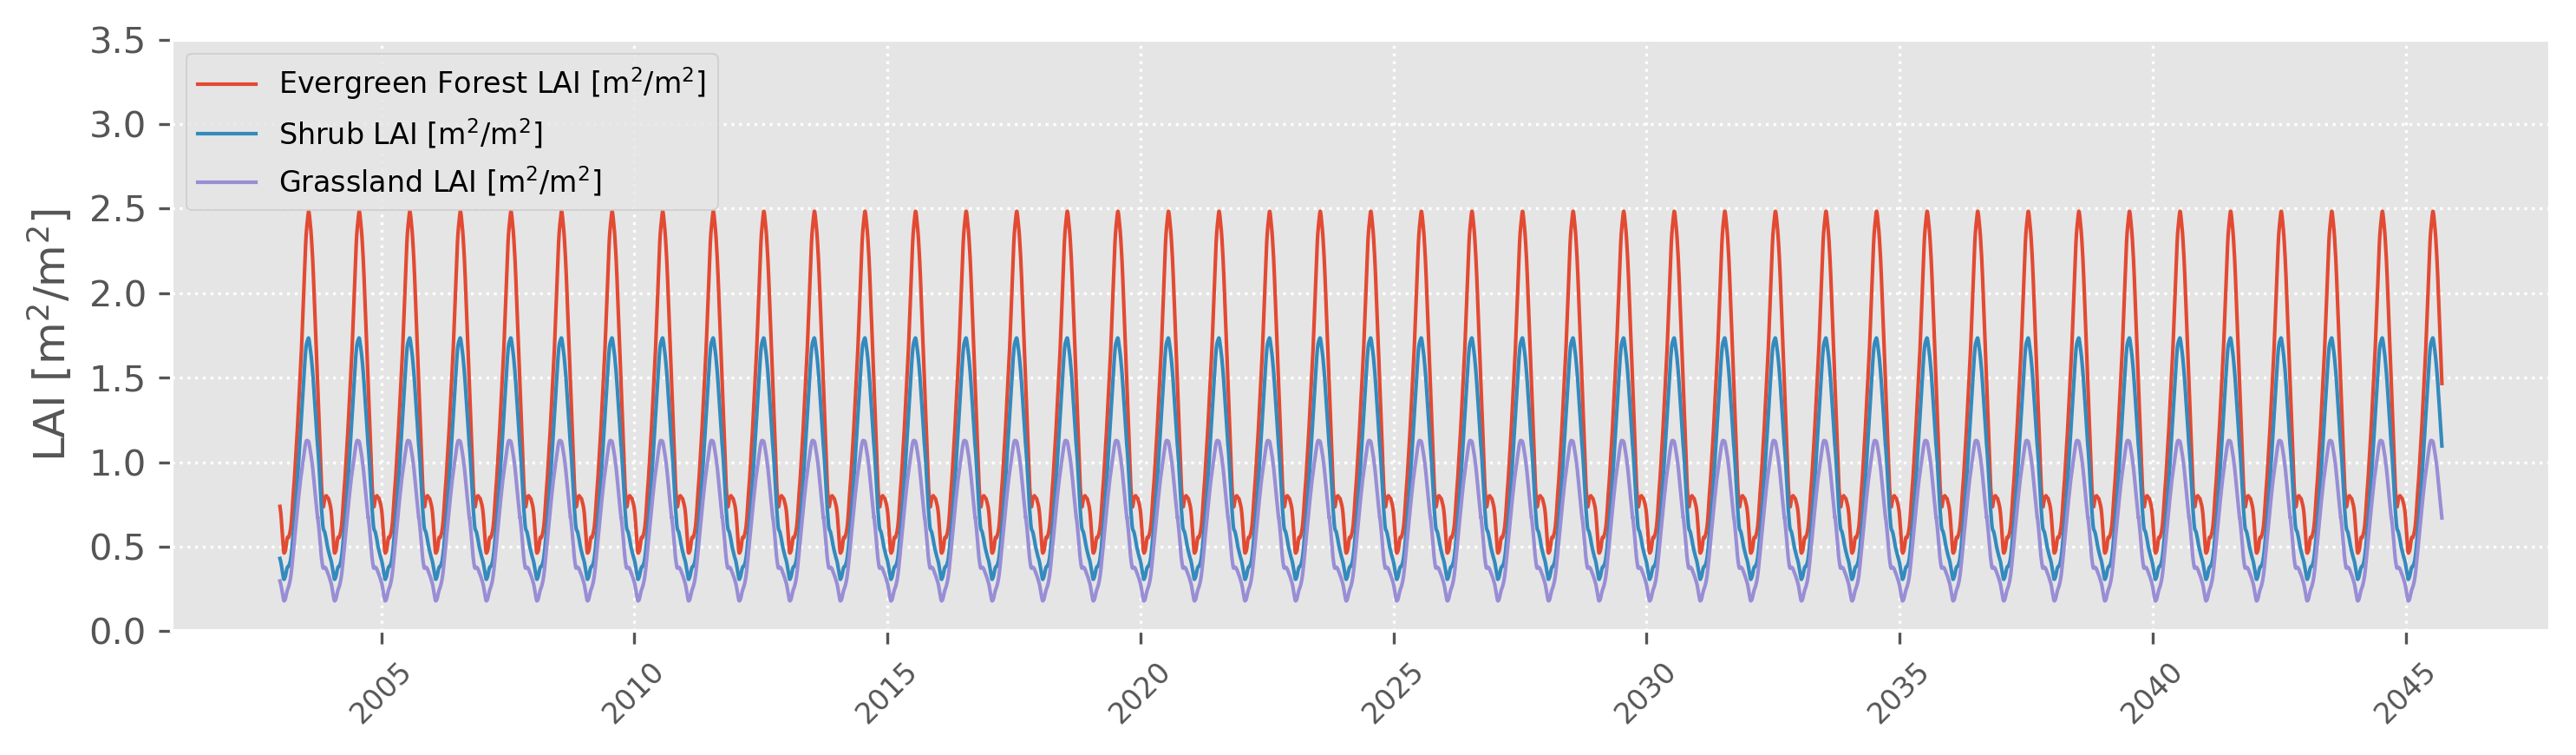

In [93]:
plt.figure(figsize=(10,3))
t = pd.to_datetime(np.arange(len(everg)), unit='D', origin=pd.Timestamp('2003-01-01'))
plt.plot(t, everg, label='Evergreen Forest LAI [m$^2$/m$^2$]')
plt.plot(t, shrub, label='Shrub LAI [m$^2$/m$^2$]')
plt.plot(t, grass, label='Grassland LAI [m$^2$/m$^2$]')
plt.xticks(rotation=45, fontsize=8)
plt.ylim(0, 3.5)
plt.ylabel('LAI [m$^2$/m$^2$]')
plt.legend(fontsize=8, loc=2)
plt.grid(ls=':', lw=0.8, color='w', zorder=0)
plt.tight_layout()
plt.show()

In [94]:
y = 2021

In [95]:
everg_1y, shrub_1y, grass_1y = everg[365*(y-2003):365*(y-2002)-5], shrub[365*(y-2003):365*(y-2002)-5], grass[365*(y-2003):365*(y-2002)-5]
len(everg_1y), len(shrub_1y), len(grass_1y)

(360, 360, 360)

<function matplotlib.pyplot.show(close=None, block=None)>

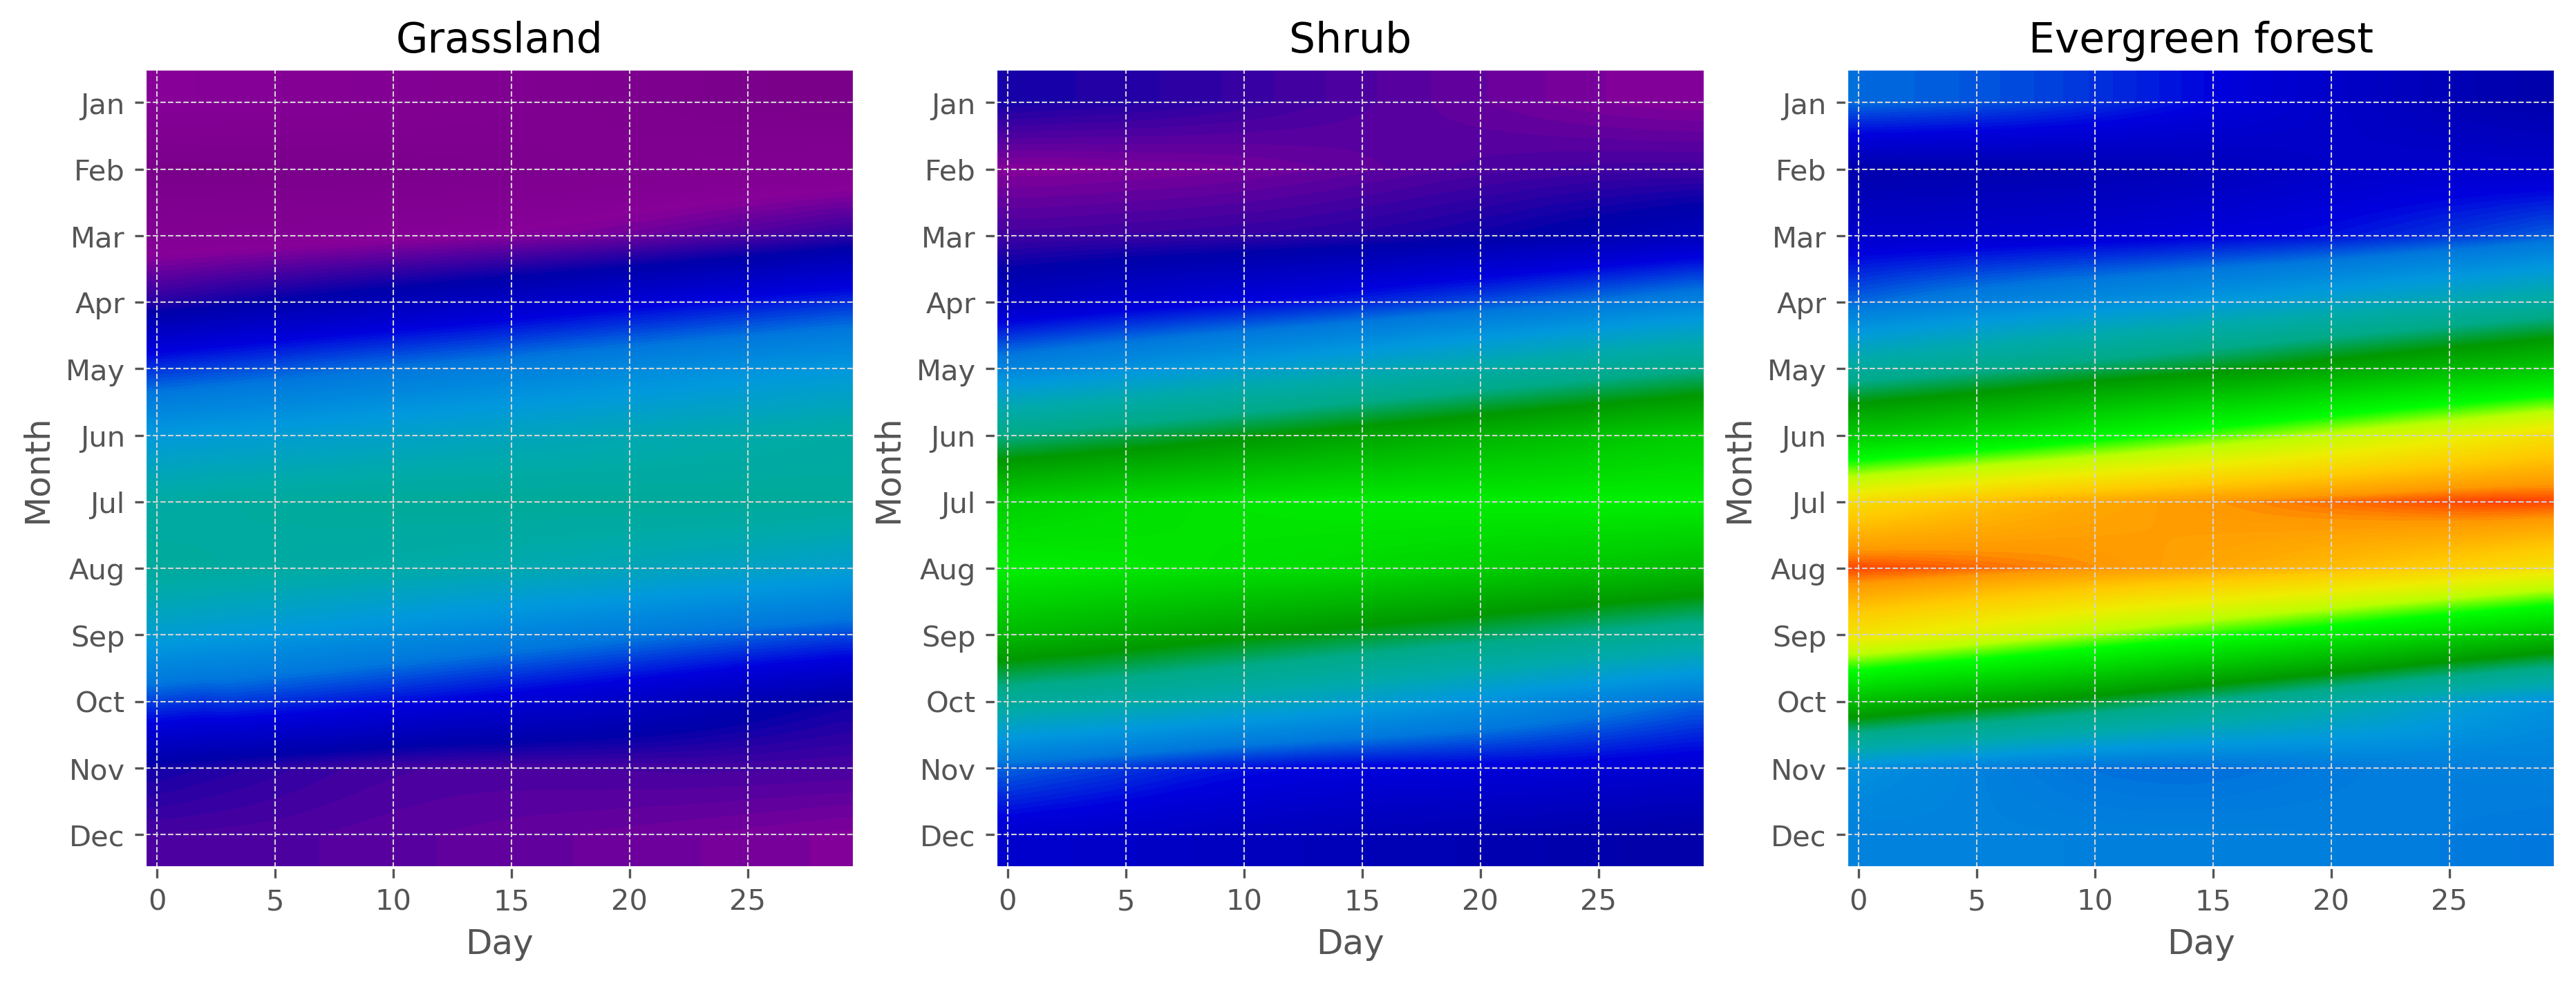

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
vmin, vmax, cmap = 0, 3, 'nipy_spectral'
im = axs[0].imshow(grass_1y.reshape(12, 30), cmap=cmap, aspect='auto', interpolation='bilinear', vmin=vmin, vmax=vmax)
# plt.gcf().colorbar(im, cax=fig.add_axes([0.22, 0.3, 0.02, 0.4]), orientation='vertical')
im = axs[1].imshow(shrub_1y.reshape(12, 30), cmap=cmap, aspect='auto', interpolation='bilinear', vmin=vmin, vmax=vmax)
# plt.gcf().colorbar(im, cax=fig.add_axes([0.52, 0.3, 0.02, 0.4]), orientation='vertical')
im = axs[2].imshow(everg_1y.reshape(12, 30), cmap=cmap, aspect='auto', interpolation='bilinear', vmin=vmin, vmax=vmax)
# cbar = plt.gcf().colorbar(im, cax=fig.add_axes([0.92, 0.3, 0.02, 0.4]), orientation='vertical', extend='max')
# cbar.minorticks_on()
# cbar.ax.set_ylabel('Leaf area index [m$^2$/m$^2$]')

for i in range(3):
    axs[i].set_xlabel('Day')
    axs[i].set_ylabel('Month')
    axs[i].set_xticks(np.arange(0, 30, 5))
    axs[i].set_yticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axs[i].grid(ls='--', lw=0.5, color='lightgrey')

axs[0].set_title('Grassland')
axs[1].set_title('Shrub')
axs[2].set_title('Evergreen forest')

# plt.savefig('./img/'+str(n).zfill(3)+'.jpg', dpi=100)
plt.show